# Session 6

This session is all about recap and application. We will not (or hardly) cover new concepts but instead apply the things we learned in the previous sessions. For this, we will use a dataset on Netflix movies. Again, this data is taken from kaggle. If you would like to know more about the data and the associated challenge, you can take a look here: https://www.kaggle.com/shivamb/netflix-shows

In [1]:
# let's load the usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# let's load the data (again, you will have to adjust the path)
df_netflix = pd.read_csv('../python_basics_johanna/data/netflix_titles.csv')

In [3]:
# let's take a look at the first 10 rows
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


Let's take a look at the columns: https://www.kaggle.com/shivamb/netflix-shows

In [4]:
# let's take a look at the columns
df_netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print(df_netflix.describe())
df_netflix.dtypes

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

1. How many unique directors are in the dataset?

In a first step, we convert the variable 'directors' from type 'object' to type 'string'. This allows us to modify this variable, in particular to split two directors in one row.

In [6]:
# turn 'directors' from object to string
df_netflix['director'] = df_netflix['director'].astype(str)

In [7]:
df_netflix['director'].head(10)

0                  Kirsten Johnson
1                              nan
2                  Julien Leclercq
3                              nan
4                              nan
5                    Mike Flanagan
6    Robert Cullen, José Luis Ucha
7                     Haile Gerima
8                  Andy Devonshire
9                   Theodore Melfi
Name: director, dtype: object

In [8]:
# We are only interested in the subset of the observations with known directors - remove 'nan' values
df_netflix = df_netflix.loc[df_netflix['director'] != 'nan']
df_netflix['director'].head(10)

0                   Kirsten Johnson
2                   Julien Leclercq
5                     Mike Flanagan
6     Robert Cullen, José Luis Ucha
7                      Haile Gerima
8                   Andy Devonshire
9                    Theodore Melfi
11                Kongkiat Komesiri
12              Christian Schwochow
13                    Bruno Garotti
Name: director, dtype: object

There are sometimes two or more directors to a movie: We need to make sure that our code recognizes the ',' as indicating a split between names

In [9]:
df_netflix['director'] = df_netflix['director'].apply(lambda x: x.split(', '))

In [10]:
df_netflix = df_netflix.reset_index(drop=True)

In [11]:
df_netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,[Julien Leclercq],"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,[Mike Flanagan],"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
4,s8,Movie,Sankofa,[Haile Gerima],"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
5,s9,TV Show,The Great British Baking Show,[Andy Devonshire],"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6,s10,Movie,The Starling,[Theodore Melfi],"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
7,s12,TV Show,Bangkok Breaking,[Kongkiat Komesiri],"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
8,s13,Movie,Je Suis Karl,[Christian Schwochow],"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
9,s14,Movie,Confessions of an Invisible Girl,[Bruno Garotti],"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


We frist 'explode' the dataframe, i.e., each director-film pair gets a separate row.

In [12]:
df_netflix_explode_directors = df_netflix.explode('director')
df_netflix_explode_directors.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
3,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
7,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


'Robert Cullen' and 'Jose Luis Ucha' now appear with the same film in two distinct rows. We can now compute the distinct values of the column 'director':

In [14]:
set(df_netflix_explode_directors['director'])

{'Sam Rega',
 'Bhavik Thakore',
 'Corbin Bernsen',
 'J.C. Falcón',
 'Mohsin Ali',
 'Li Jun',
 'Tom Stubberfield',
 'Amit Barot',
 'Ava DuVernay',
 'Syrine Boulanouar',
 'Samuel D. Pollard',
 'Jakob Verbruggen',
 'Sarah Moshman',
 'Bill Plympton',
 'Sean Olson',
 'Jan Suter',
 'Brian A. Miller',
 'Michelle Johnston',
 'John Dahl',
 'Takashi Yamazaki',
 'Adarsh Eshwarappa',
 'Sanjeev Gupta',
 'Wayne Orr',
 'Deniz Gamze Ergüven',
 'Sofia Coppola',
 'Ignacio López Escrivá',
 'Martha Coolidge',
 'Juan Pablo Rebella',
 'Sam Raimi',
 'Robert Nixon',
 'Esteban Sapir',
 'Tigmanshu Dhulia',
 'Ayaan Mukherji',
 'Navjot Gulati',
 'Ramin Bahrani',
 'Julia Willoughby Nason',
 'Marek Losey',
 'Julien Rambaldi',
 'Milton Kremer',
 'Keishi Otomo',
 'Daniel Růžička',
 'Benjamin Weill',
 'David Alvarado',
 'Todd Haynes',
 'Tyler Greco',
 'Julius R. Nasso',
 'Semi Chellas',
 'Carlos Moreno',
 'Galley Molina',
 'Brian Webber',
 'David A. Vargas',
 'Michael Apted',
 'Leticia Jorge Romero',
 'Kristian Levrin

In [15]:
print('Number of unique directors: ', len(set(df_netflix_explode_directors['director'])))

Number of unique directors:  4993


2. How many directors are there with the name 'Weinstein'? - There are several ways to do this.

In [16]:
# option 1: filter dataframe
df_weinstein = df_netflix_explode_directors.loc[df_netflix_explode_directors['director'].str.contains('Weinstein')]

In [17]:
df_epstein

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2016,s2989,Movie,Menashe,Josh Z. Weinstein,"Menashe Lustig, Ruben Niborski, Yoel Weisshaus...",United States,"January 25, 2020",2017,PG,82 min,"Dramas, Independent Movies","A year after his wife's death, a widower faces..."
2016,s2989,Movie,Menashe,Joshua Z. Weinstein,"Menashe Lustig, Ruben Niborski, Yoel Weisshaus...",United States,"January 25, 2020",2017,PG,82 min,"Dramas, Independent Movies","A year after his wife's death, a widower faces..."
4126,s6222,Movie,Balto 2: Wolf Quest,Phil Weinstein,"Maurice LaMarche, Jodi Benson, Lacey Chabert, ...",United States,"April 1, 2018",2001,G,75 min,Children & Family Movies,"Half-dog, half-wolf Balto (voiced by Maurice L..."
4127,s6223,Movie,Balto 3: Wings of Change,Phil Weinstein,"Maurice LaMarche, Sean Astin, Keith Carradine,...",United States,"April 1, 2018",2004,G,78 min,Children & Family Movies,A pilot challenges Balto's son Kodi and his sl...


In [113]:
len(df_weinstein)

3

In [58]:
# option 2: for-loop and if condition

In [18]:
set_directors = set(df_netflix_explode_directors['director'])

In [19]:
print(set_directors)

{'Sam Rega', 'Bhavik Thakore', 'Corbin Bernsen', 'J.C. Falcón', 'Mohsin Ali', 'Li Jun', 'Tom Stubberfield', 'Amit Barot', 'Ava DuVernay', 'Syrine Boulanouar', 'Samuel D. Pollard', 'Jakob Verbruggen', 'Sarah Moshman', 'Bill Plympton', 'Sean Olson', 'Jan Suter', 'Brian A. Miller', 'Michelle Johnston', 'John Dahl', 'Takashi Yamazaki', 'Adarsh Eshwarappa', 'Sanjeev Gupta', 'Wayne Orr', 'Deniz Gamze Ergüven', 'Sofia Coppola', 'Ignacio López Escrivá', 'Martha Coolidge', 'Juan Pablo Rebella', 'Sam Raimi', 'Robert Nixon', 'Esteban Sapir', 'Tigmanshu Dhulia', 'Ayaan Mukherji', 'Navjot Gulati', 'Ramin Bahrani', 'Julia Willoughby Nason', 'Marek Losey', 'Julien Rambaldi', 'Milton Kremer', 'Keishi Otomo', 'Daniel Růžička', 'Benjamin Weill', 'David Alvarado', 'Todd Haynes', 'Tyler Greco', 'Julius R. Nasso', 'Semi Chellas', 'Carlos Moreno', 'Galley Molina', 'Brian Webber', 'David A. Vargas', 'Michael Apted', 'Leticia Jorge Romero', 'Kristian Levring', 'Parveen Kumar', 'Murat Kepez', 'Gerardo Olivares

In [20]:
for i in list(set_directors):
    print(i)

Sam Rega
Bhavik Thakore
Corbin Bernsen
J.C. Falcón
Mohsin Ali
Li Jun
Tom Stubberfield
Amit Barot
Ava DuVernay
Syrine Boulanouar
Samuel D. Pollard
Jakob Verbruggen
Sarah Moshman
Bill Plympton
Sean Olson
Jan Suter
Brian A. Miller
Michelle Johnston
John Dahl
Takashi Yamazaki
Adarsh Eshwarappa
Sanjeev Gupta
Wayne Orr
Deniz Gamze Ergüven
Sofia Coppola
Ignacio López Escrivá
Martha Coolidge
Juan Pablo Rebella
Sam Raimi
Robert Nixon
Esteban Sapir
Tigmanshu Dhulia
Ayaan Mukherji
Navjot Gulati
Ramin Bahrani
Julia Willoughby Nason
Marek Losey
Julien Rambaldi
Milton Kremer
Keishi Otomo
Daniel Růžička
Benjamin Weill
David Alvarado
Todd Haynes
Tyler Greco
Julius R. Nasso
Semi Chellas
Carlos Moreno
Galley Molina
Brian Webber
David A. Vargas
Michael Apted
Leticia Jorge Romero
Kristian Levring
Parveen Kumar
Murat Kepez
Gerardo Olivares
Fredric Lean
Şenol Sönmez
Asri Bendacha
Maya Forbes
David Hebditch
Nitesh Tiwari
Nick Broomfield
Dan Gilroy
Amanda Micheli
Marcelo Altmark
Eva Trobisch
Gaspar Antillo
Li

Kittiphak Thonguam
Bonni Cohen
Mona Achache
Marc Pons
Marti Noxon
Richard Laxton
Athiyan Athirai
Salvador Espinosa
Yuki Yamato
Gurinder Chadha
Bharat Jain
Ramon Térmens
Carlos Marques-Marcet
Gustavo Ron
Jody Hill
Daito Manabe
Lennart Ruff
Ian Cheney
Stacy Title
Bette Gordon
Filip Zylber
George Gallo
Vijay S. Bhanushali
Okey Oku
Malcolm D. Lee
Andrés Feddersen
Oz Rodriguez
Ahmed Al-Badry
Lonzo Nzekwe
Sam Levinson
Sibusiso Khuzwayo
Stephanie Soechtig
Charlie Vaughn
Han Kwang Il
Norman Jewison
Hazem Fouda
Zara Hayes
V. K. Prakash
Michael G. Kehoe
Radha Blank
George Mendeluk
Arnab Chaudhuri
Syamsul Yusof
Kabir Sadanand
Nagesh Kukunoor
Shawn Levy
Deepti Naval
Michael Pitiot
Juan José Campanella
William Wyler
Robert Clouse
Ron Howard
Nicholas de Pencier
Hayao Miyazaki
Sean Cisterna
Kevin Reynolds
Dylan Southern
Pietro Scappini
Dana Doron
Matt Palmer
Tomm Moore
Sartaj Singh Pannu
Mehmet Ada Öztekin
Matthew Atkinson
Gabriela Tagliavini
Brent Dawes
Anneliese Vandenberg
Sophia Nahli Allison
Mina

Chito S. Roño
Subhash Kapoor
Rajkumar Santoshi
Rashida Jones
Nicholas Ray
Dallas Jenkins
Vitor Brandt
Gaëtan Brizzi
Beeban Kidron
Michael Spierig
Matei Dima
Chris Sanders
Michael Simon
Sandy Chronopoulos
Onir
Lasse Hallström
Joseph Sargent
Stuart Orme
Aaron Woolf
Sai Paranjape
Kevin Bray
Michael Seater
Sachin Yardi
Alban Teurlai
Bong Joon Ho
Robert Cannan
Justin Chadwick
Dani Levy
Osman Ali
Max Martini
Wade Allain-Marcus
Kiki Goshay
Tekin Girgin
Paul Feig
Alma Har'el
Viju Mane
Ross Adam
Juan Carlos Medina
Meisa Felaroze
Kobun Shizuno
Carlos Morett
Chris Robinson
Mir Mukarram Hossain
Juan Antonio de la Riva
Gabe Turner
Robb Wells
Nobuyuki Takeuchi
Monique Gardenberg
Evan Katz
Keanu Reeves
Max Joseph
Mary Lambert
Takuya Igarashi
Jon Izen
Michael Govier
Chia-Liang Liu
Avinash Walzade
Sakon Tiacharoen
Hadrah Daeng Ratu
Tim Bartley
Raam Reddy
Nisheeta Keni
Abhishek Saxena
Stephen Donnelly
Sameh Abdulaziz
Reema Kagti
Martín Sastre
Vrinda Samartha
Pulkit
Nopparoj Chotmunkongsit
Melanie Mayron

Isaki Lacuesta
Burhan Qurbani
Masaru Matsumoto
Ali Samadi Ahadi
Sang-ho Yeon
Fred Wolf
Peter Sattler
Bruce McDonald
Tatiana Villela
Youssef Chahine
Akshay Akkineni
Jack Starrett
Michael Wech
Felix Herngren
George Miller
Khalid Mohamed
Sonia Kennebeck
Marston Sawyers
Oskar Santos
David Fincher
Lesli Linka Glatter
Susan Lacy
Will Canon
Corey Yuen
Farjad Nabi
Louis C.K.
Sorin Dan Mihalcescu
Hajime Sasaki
Kathleen Hepburn
Robert Berlinger
Valeria Pivato
Quoc Bao Tran
Robin Aubert
Greg Mottola
Dean Wright
Mae Czarina Cruz
Stefano Lodovichi
Adam Randall
Moses Inwang
Armando Iannucci
Igor Kovalyov
Alberto Arnaut Estrada
Florian Gallenberger
Raj Babu
Sriram Raghavan
Renny Harlin
Sonny Mallhi
Law Wing-cheong
Gregg Bishop
Taki Oldham
Lucien Bourjeily
Wash Westmoreland
Leif Tilden
Marco Pontecorvo
Edoardo Ponti
Josh Izenberg
David Silberg
Doron Paz
Brett Weiner
Han Han
Rudradeep Bhattacharjee
Sharan Koppisetty
Christian Herrendoerfer
Domenico de Feudis
Paul Brizzi
Greg Coolidge
Jeff Garlin
Ian Da

In [21]:
for i in list(set_directors):
    if 'Weinstein' in i:
        print(i)

Phil Weinstein
Joshua Z. Weinstein
Josh Z. Weinstein


In [22]:
# option 3: list comprehension (another way of writing the for-loop)
[i for i in list(set_directors) if 'Weinstein' in i]

['Phil Weinstein', 'Joshua Z. Weinstein', 'Josh Z. Weinstein']

3. Who are the most productive directors?

In [121]:
df_netflix['director'].value_counts()

[Rajiv Chilaka]                  19
[Raúl Campos, Jan Suter]         18
[Suhas Kadav]                    16
[Marcus Raboy]                   16
[Jay Karas]                      14
                                 ..
[Phil Nibbelink, Simon Wells]     1
[Elliot Silverstein]              1
[Musthafa]                        1
[Ricardo Trogi]                   1
[Brett Whitcomb]                  1
Name: director, Length: 4528, dtype: int64

In [ ]:
# this treats two directors as one
df_netflix['director'].value_counts().head(20)

In [122]:
# this considers the directors individually
df_netflix_explode_directors['director'].value_counts().head(20)

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       11
Don Michael Paul       10
Yılmaz Erdoğan          9
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Ryan Polito             8
Johnnie To              8
Hakan Algül             8
Quentin Tarantino       8
Name: director, dtype: int64

4. Who are the most casted actors?

In [ ]:
df_netflix['cast']

In [123]:
df_netflix['cast'] = df_netflix['cast'].astype(str)

In [125]:
df_netflix = df_netflix.loc[df_netflix['cast'] != 'nan']

In [127]:
df_netflix['cast'] = df_netflix['cast'].apply(lambda x: x.split(', '))

AttributeError: 'list' object has no attribute 'split'

In [128]:
len(df_netflix)

5700

In [129]:
df_netflix_explode_cast = df_netflix.explode('cast')
df_netflix_explode_cast

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s3,TV Show,Ganglands,[Julien Leclercq],Sami Bouajila,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s3,TV Show,Ganglands,[Julien Leclercq],Tracy Gotoas,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s3,TV Show,Ganglands,[Julien Leclercq],Samuel Jouy,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s3,TV Show,Ganglands,[Julien Leclercq],Nabiha Akkari,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s3,TV Show,Ganglands,[Julien Leclercq],Sofia Lesaffre,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
6172,s8807,Movie,Zubaan,[Mozez Singh],Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
6172,s8807,Movie,Zubaan,[Mozez Singh],Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
6172,s8807,Movie,Zubaan,[Mozez Singh],Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
6172,s8807,Movie,Zubaan,[Mozez Singh],Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [130]:
df_netflix_explode_cast['cast'].value_counts().head(30)

Anupam Kher            42
Shah Rukh Khan         35
Naseeruddin Shah       32
Om Puri                30
Akshay Kumar           30
Julie Tejwani          28
Paresh Rawal           28
Amitabh Bachchan       28
Rupa Bhimani           27
Boman Irani            27
Kareena Kapoor         25
Samuel L. Jackson      23
Kay Kay Menon          21
Ajay Devgn             21
Nawazuddin Siddiqui    21
Rajesh Kava            21
Adam Sandler           20
Salman Khan            20
Nicolas Cage           20
James Franco           19
Gulshan Grover         19
Jigna Bhardwaj         19
Yashpal Sharma         18
Anil Kapoor            18
John Cleese            18
Rajesh Sharma          17
Jackie Shroff          17
Saif Ali Khan          17
Rajpal Yadav           17
Asrani                 17
Name: cast, dtype: int64

5. How many movies featured Angelina Jolie and Brad Pitt as actors, respectively, and in which years? How might this account for their marriage problems?

In [132]:
df_jolie = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Angelina Jolie')]
df_jolie.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
222,s328,Movie,Beowulf,[Robert Zemeckis],Angelina Jolie,"United States, United Kingdom","August 1, 2021",2007,PG-13,114 min,"Action & Adventure, Sci-Fi & Fantasy",This deftly animated take on a legendary Old E...
383,s574,Movie,Kung Fu Panda,"[John Stevenson, Mark Osborne]",Angelina Jolie,"United States, China","July 1, 2021",2008,PG,94 min,"Children & Family Movies, Comedies",When a powerful villain comes after peace in h...
384,s575,Movie,Kung Fu Panda 2,[Jennifer Yuh Nelson],Angelina Jolie,"United States, China","July 1, 2021",2011,PG,93 min,"Children & Family Movies, Comedies","With his fists up and belly full, Po embarks o..."
417,s610,Movie,The Tourist,[Florian Henckel von Donnersmarck],Angelina Jolie,"United States, France, Italy, United Kingdom","July 1, 2021",2010,PG-13,103 min,"Action & Adventure, Romantic Movies",An American tourist seeking solace for his sha...
1961,s2904,Movie,By the Sea,[Angelina Jolie],Angelina Jolie,"France, Malta, United States","February 16, 2020",2015,R,122 min,"Dramas, Romantic Movies","Troubled by the state of their marriage, Vanes..."
4923,s7242,Movie,Kung Fu Panda: Holiday,[Tim Johnson],Angelina Jolie,United States,"December 1, 2012",2010,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


In [133]:
df_pitt = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Brad Pitt')]
df_pitt.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
433,s631,Movie,Killing Them Softly,[Andrew Dominik],Brad Pitt,United States,"June 28, 2021",2012,R,97 min,Dramas,When a couple of low-level crooks rob a Mob-pr...
1961,s2904,Movie,By the Sea,[Angelina Jolie],Brad Pitt,"France, Malta, United States","February 16, 2020",2015,R,122 min,"Dramas, Romantic Movies","Troubled by the state of their marriage, Vanes..."
3561,s5474,Movie,War Machine,[David Michôd],Brad Pitt,United States,"May 26, 2017",2017,TV-MA,123 min,"Comedies, Dramas",When a proud general is tasked with winning an...
3886,s5943,Movie,A Stoning in Fulham County,[Larry Elikann],Brad Pitt,United States,"October 1, 2011",1988,TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr..."
4113,s6206,Movie,Babel,[Alejandro G. Iñárritu],Brad Pitt,"France, United States, Mexico","January 1, 2019",2006,R,143 min,"Dramas, Independent Movies",When an American couple vacationing in Morocco...
4793,s7078,Movie,Inglourious Basterds,[Quentin Tarantino],Brad Pitt,"Germany, United States","July 22, 2019",2009,R,153 min,Action & Adventure,A Jewish cinema owner in occupied Paris is for...
5233,s7639,Movie,Ocean's Thirteen,[Steven Soderbergh],Brad Pitt,United States,"October 1, 2019",2007,PG-13,122 min,"Action & Adventure, Comedies",This entry in the all-star caper franchise fin...
5234,s7640,Movie,Ocean's Twelve,[Steven Soderbergh],Brad Pitt,United States,"October 1, 2019",2004,PG-13,125 min,"Action & Adventure, Comedies",Danny Ocean reunites with his old flame and th...


In [134]:
df_jolie_year = df_jolie.groupby('release_year')['cast'].count()
print(df_jolie_year)

release_year
2007    1
2008    1
2010    2
2011    1
2015    1
Name: cast, dtype: int64


In [136]:
df_pitt_year = df_pitt.groupby('release_year')['cast'].count()
print(df_pitt_year)

release_year
1988    1
2004    1
2006    1
2007    1
2009    1
2012    1
2015    1
2017    1
Name: cast, dtype: int64


Do they have marriage problems because they were on the set at the same time and did not have enough 'quality' time with each other? Or, do they have marriage problems precisely because their release schedules were too similar and they spend too much time with each other?

In [138]:
pd.merge(df_jolie_year, df_pitt_year, on='release_year', how='left')

,cast_x,cast_y
release_year,,
2007,1,1.0
2008,1,NaN
2010,2,NaN
2011,1,NaN
2015,1,1.0


Their schedules seem to be pretty asynchronous. Not enough 'quality' time! How about Ashton Kutcher and Demi Moore (divorce in 2013) and Mila Kunis (married since 2015)?

In [215]:
df_kutcher = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Ashton Kutcher')]
df_kutcher_year = df_kutcher.groupby('release_year')['cast'].count()
print(df_kutcher_year)

release_year
2003    1
2006    1
2010    2
2011    1
Name: cast, dtype: int64


In [214]:
df_kunis = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Mila Kunis')]
df_kunis_year = df_kunis.groupby('release_year')['cast'].count()
print(df_kunis_year)

release_year
2010    1
2015    2
2017    1
Name: cast, dtype: int64


In [213]:
df_moore = df_netflix_explode_cast.loc[df_netflix_explode_cast['cast'].str.contains('Demi Moore')]
df_moore_year = df_moore.groupby('release_year')['cast'].count()
print(df_moore_year)

release_year
1995    1
1996    2
2003    1
2016    1
Name: cast, dtype: int64


In [217]:
pd.merge(df_kutcher_year, df_moore_year, on='release_year')

,cast_x,cast_y
release_year,,
2003,1,1


In [218]:
pd.merge(df_kutcher_year, df_kunis_year, on='release_year')

,cast_x,cast_y
release_year,,
2010,2,1


Again, their schedules seem to be pretty asynchronous. Probably not the best conditions for a long-term relationship ...

6. What is the earliest and median release year in the dataset?

In [139]:
print(df_netflix['release_year'].min())
print(df_netflix['release_year'].median())

1942
2016.0


In [140]:
df_netflix.loc[df_netflix['release_year'] == 1942]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5678,s8206,Movie,The Battle of Midway,[John Ford],"[Henry Fonda, Jane Darwell]",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...


7. What is the occurence of release years? That is, how many movies does Netflix offer that were released in 2021, 2020, etc.?

In [30]:
df_occ_year = df_netflix['release_year'].value_counts()
print(df_occ_year)

2017    773
2018    760
2016    653
2019    629
2020    548
       ... 
1966      1
1961      1
1947      1
1959      1
1963      1
Name: release_year, Length: 73, dtype: int64


8. Plot the distribution of release years, using a histogram. Make sure to include a title and a label for the x-axis.

c:\users\johanna.schnier\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of release years')]

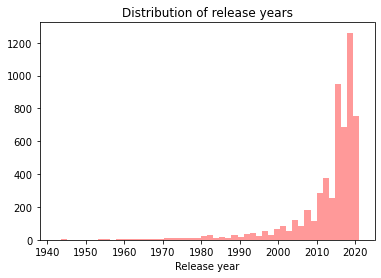

In [143]:
ax = sns.distplot(df_netflix['release_year'], color='r', kde=False)
ax.set(xlabel = 'Release year')
ax.set(title = 'Distribution of release years')